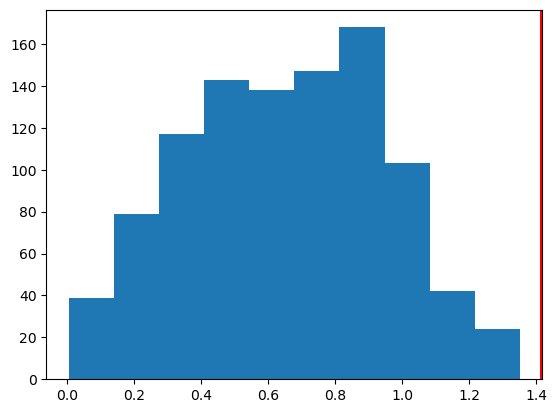

In [23]:
import numpy as np
from astropy.coordinates import SkyCoord
import astropy.units as u
from astropy.table import Table
import matplotlib.pyplot as plt

arcsec2deg = 1 / 3600.

# Generate a catalog of random RA and DEC
n_objects = 1000
ra1 = np.random.uniform(0, 360, n_objects)  # Random RA between 0 and 360 degrees
dec1 = np.random.uniform(-90, 90, n_objects)  # Random DEC between -90 and 90 degrees

# Create a small offset in the second catalog
ra_offset = np.random.uniform(0, 1 * arcsec2deg, n_objects)  # Small RA offset in arcsec
dec_offset = np.random.uniform(0, 1 * arcsec2deg, n_objects)  # Small DEC offset in arcsec
ra2 = ra1 + ra_offset
dec2 = dec1 + dec_offset

# Create catalogs using Astropy tables
catalog1 = Table([ra1, dec1], names=('ra', 'dec'))
catalog2 = Table([ra2, dec2], names=('ra', 'dec'))

# Convert RA/DEC to SkyCoord objects for matching
coords1 = SkyCoord(ra=catalog1['ra']*u.degree, dec=catalog1['dec']*u.degree)
coords2 = SkyCoord(ra=catalog2['ra']*u.degree, dec=catalog2['dec']*u.degree)

# Perform cross-matching between the two catalogs
idx, d2d, _ = coords1.match_to_catalog_sky(coords2)

# if the matching is successful, the indices should be the same as the range of the number of objects
assert np.all(idx == np.arange(n_objects))

# Get the indices and separations (in degrees) for the matched objects
matched_catalog1 = catalog1
matched_catalog2 = catalog2[idx]
separations = d2d.to(u.arcsec)  # Convert separations to arcseconds

# Add separations to the table for reference
matched_catalog1['separation_arcsec'] = separations

plt.hist(separations, bins=10)
plt.axvline(np.sqrt(2), c="r")
assert np.max(separations) / u.arcsec <= np.sqrt(1**2 + 1**2)